In [1]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv("Datasets/industry_realistic_pricing_dataset.csv")
df.head()

,Product ID,Price,Competitor Price,Elasticity Index,Discount,Sales Volume,Customer Reviews,Return Rate (%),Storage Cost
0,1,45.43,44.28,1.50,0.05,104,4.06,1.03,14.51
1,2,52.61,50.85,1.99,0.15,133,3.90,2.02,9.11
2,3,86.91,81.28,1.63,0.20,49,4.03,9.35,9.49
3,4,40.60,41.47,0.67,0.20,449,4.83,2.14,16.54
4,5,88.27,87.86,0.87,0.10,85,4.14,4.30,9.37


In [29]:
df.columns

Index(['Product ID', 'Price', 'Competitor Price', 'Elasticity Index',
       'Discount', 'Sales Volume', 'Customer Reviews', 'Return Rate (%)',
       'Storage Cost'],
      dtype='object')

---

## Data Cleaning:

In [30]:
df.shape

(5000, 9)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        5000 non-null   int64  
 1   Price             5000 non-null   float64
 2   Competitor Price  5000 non-null   float64
 3   Elasticity Index  5000 non-null   float64
 4   Discount          5000 non-null   float64
 5   Sales Volume      5000 non-null   int64  
 6   Customer Reviews  5000 non-null   float64
 7   Return Rate (%)   5000 non-null   float64
 8   Storage Cost      5000 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 351.7 KB


In [32]:
df.isna().sum()

Product ID          0
Price               0
Competitor Price    0
Elasticity Index    0
Discount            0
Sales Volume        0
Customer Reviews    0
Return Rate (%)     0
Storage Cost        0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

### ⭐ <u>Observation</u>: Total 5K Rows and 9 features. No Duplicated and Null Values. All features are in integer or float data types.

---

## <u>EDA</u> : 

In [34]:
df.head()

,Product ID,Price,Competitor Price,Elasticity Index,Discount,Sales Volume,Customer Reviews,Return Rate (%),Storage Cost
0,1,45.43,44.28,1.50,0.05,104,4.06,1.03,14.51
1,2,52.61,50.85,1.99,0.15,133,3.90,2.02,9.11
2,3,86.91,81.28,1.63,0.20,49,4.03,9.35,9.49
3,4,40.60,41.47,0.67,0.20,449,4.83,2.14,16.54
4,5,88.27,87.86,0.87,0.10,85,4.14,4.30,9.37


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Price', ylabel='Sales Volume'>

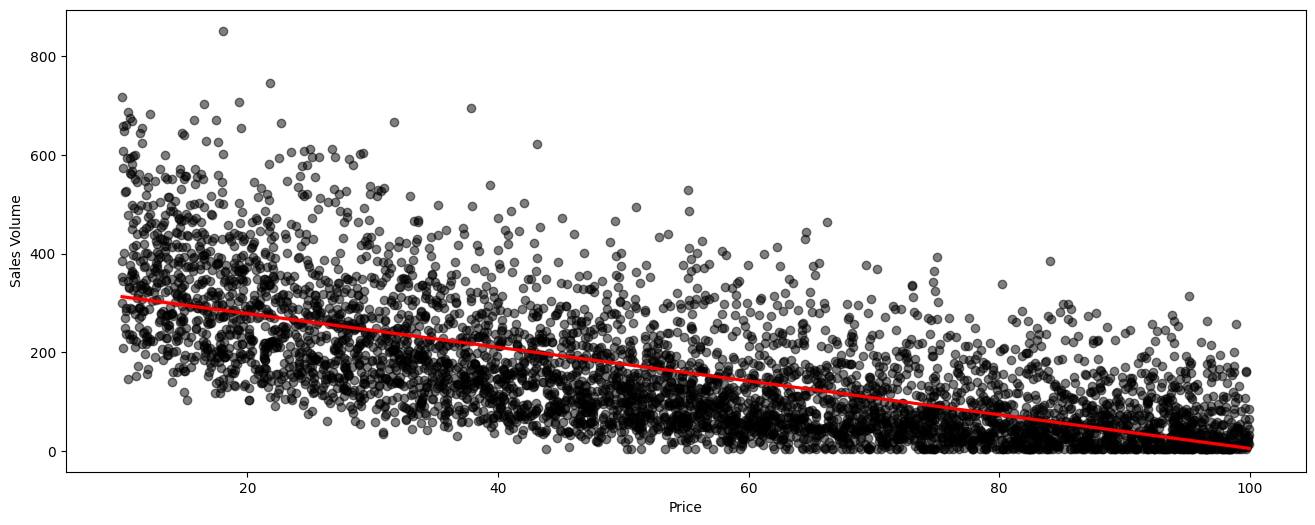

In [36]:
plt.figure(figsize=(16,6))
sns.regplot(data=df,x=df['Price'],y=df['Sales Volume'],
            scatter_kws={"color": "black", "alpha": 0.5},
            line_kws={"color": "red"})

<Axes: xlabel='Elasticity Index', ylabel='Count'>

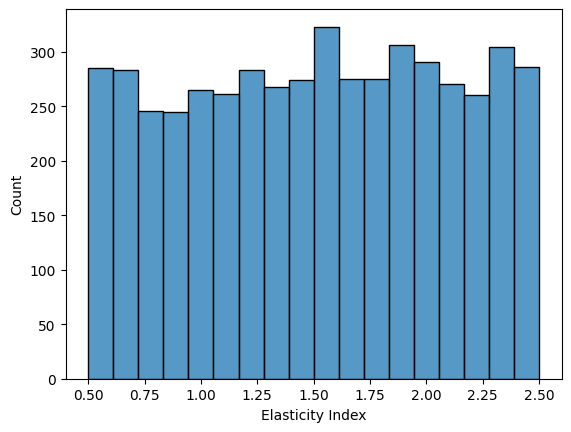

In [37]:
sns.histplot(data=df,x=df['Elasticity Index'])

<Axes: xlabel='Elasticity Index', ylabel='Sales Volume'>

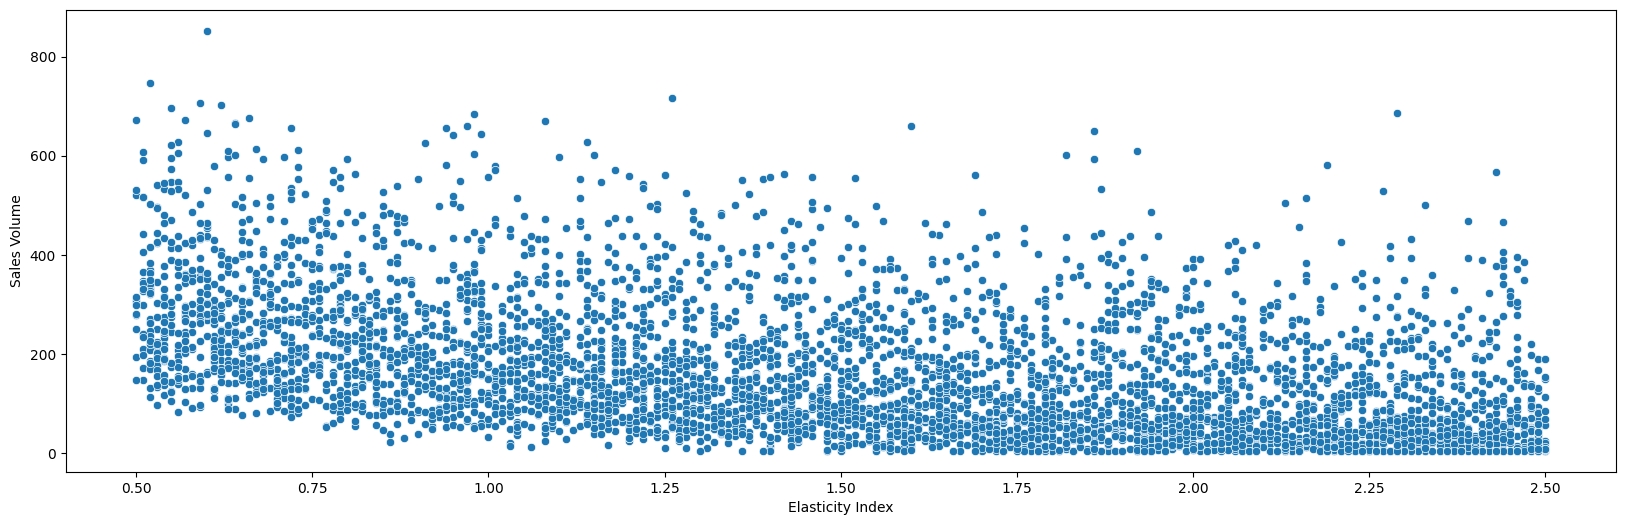

In [38]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=df['Elasticity Index'], y=df['Sales Volume'],data=df)

## Model Training:

In [39]:
df.head()

,Product ID,Price,Competitor Price,Elasticity Index,Discount,Sales Volume,Customer Reviews,Return Rate (%),Storage Cost
0,1,45.43,44.28,1.50,0.05,104,4.06,1.03,14.51
1,2,52.61,50.85,1.99,0.15,133,3.90,2.02,9.11
2,3,86.91,81.28,1.63,0.20,49,4.03,9.35,9.49
3,4,40.60,41.47,0.67,0.20,449,4.83,2.14,16.54
4,5,88.27,87.86,0.87,0.10,85,4.14,4.30,9.37


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [43]:
x = df.drop(["Sales Volume","Product ID"],axis=1)
y = df['Sales Volume']

In [44]:
x.shape,y.shape

((5000, 7), (5000,))

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4000, 7), (4000,), (1000, 7), (1000,))

In [70]:
rf = RandomForestRegressor(n_estimators=31)
rf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",31
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [71]:
rf.score(x_test,y_test)

0.7567293769386201

In [72]:
values = []
for i in range(1,100):
    rf.fit(x_train,y_train)
    values.append(rf.score(x_test,y_test))

max(values)

0.7675456115899624

In [74]:
values.index(0.7675456115899624)

37

In [83]:
rf = RandomForestRegressor(n_estimators=36)
rf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",36
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [84]:
rf.score(x_test,y_test)

0.7660658391346645

In [86]:
import joblib

joblib.dump(rf,"rf_model_on_synthetic_data.joblib")

['rf_model_on_synthetic_data.joblib']

## Evaluation:

### 1. Pricing Scenarios:

In [91]:
df.head()

,Product ID,Price,Competitor Price,Elasticity Index,Discount,Sales Volume,Customer Reviews,Return Rate (%),Storage Cost
0,1,45.43,44.28,1.50,0.05,104,4.06,1.03,14.51
1,2,52.61,50.85,1.99,0.15,133,3.90,2.02,9.11
2,3,86.91,81.28,1.63,0.20,49,4.03,9.35,9.49
3,4,40.60,41.47,0.67,0.20,449,4.83,2.14,16.54
4,5,88.27,87.86,0.87,0.10,85,4.14,4.30,9.37


In [88]:
X_scenario = x_test.copy()
X_scenario["Competitor Price"] *= 1.10

y_pred_original = rf.predict(x_test)
y_pred_scenario = rf.predict(X_scenario)

print("Mean prediction (original):", np.mean(y_pred_original))
print("Mean prediction (competitor +10%):", np.mean(y_pred_scenario))


Mean prediction (original): 163.42402777777775
Mean prediction (competitor +10%): 165.067


### 2. Stress Testing:

In [89]:
X_stress = x_test.copy()
X_stress["Discount"] = 0.6   # 60% discount

y_pred_stress = rf.predict(X_stress)

print("Min:", y_pred_stress.min())
print("Max:", y_pred_stress.max())
print("Mean:", y_pred_stress.mean())


Min: 13.13888888888889
Max: 580.5277777777778
Mean: 182.9903888888889


Max value is very high and Range is wide
### <u>Observation</u>: “Under extreme discounts, the model can produce unrealistic predictions.”

In [93]:
# Covariate Shift (features change)
X_shift = x_test.copy()
X_shift["Elasticity Index"] *= 1.3  # More sensitive customers

y_shift_pred = rf.predict(X_shift)
# y_shift_pred

In [94]:
np.std(y_pred_original), np.std(y_shift_pred)


(np.float64(114.6781785940975), np.float64(106.87997452533503))

---

### Competitor Price vs Model Prediction

- Before (original competitor price)
- After (+10%, +20%)

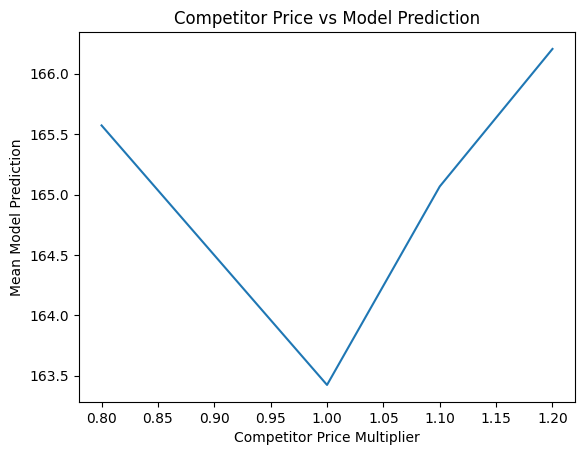

In [95]:
competitor_factors = [0.8, 1.0, 1.1, 1.2]
mean_predictions = []

for factor in competitor_factors:
    X_temp = x_test.copy()
    X_temp["Competitor Price"] *= factor
    preds = rf.predict(X_temp)
    mean_predictions.append(np.mean(preds))

plt.plot(competitor_factors, mean_predictions)
plt.xlabel("Competitor Price Multiplier")
plt.ylabel("Mean Model Prediction")
plt.title("Competitor Price vs Model Prediction")
plt.show()


---

### Discount vs Model Prediction

- Before (normal discount)
- After (extreme discount)

📌 This shows Shows price elasticity awareness.

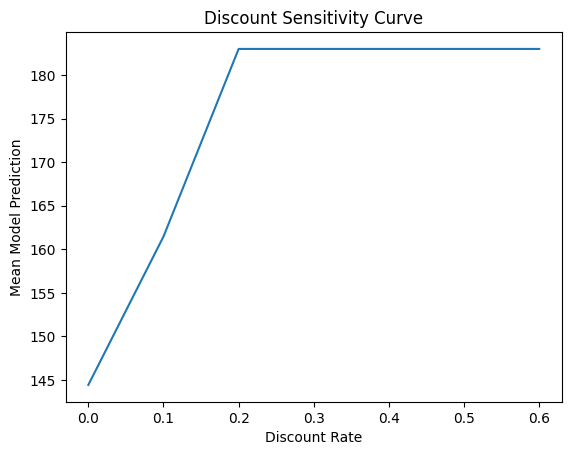

In [96]:
discounts = np.linspace(0, 0.6, 7)
mean_preds = []

for d in discounts:
    X_temp = x_test.copy()
    X_temp["Discount"] = d
    preds = rf.predict(X_temp)
    mean_preds.append(np.mean(preds))

plt.plot(discounts, mean_preds)
plt.xlabel("Discount Rate")
plt.ylabel("Mean Model Prediction")
plt.title("Discount Sensitivity Curve")
plt.show()


---

### Elasticity Index vs Prediction Variance

- Std decreases as elasticity increases
- Smooth curve

📌 This shows stability under market shifts.

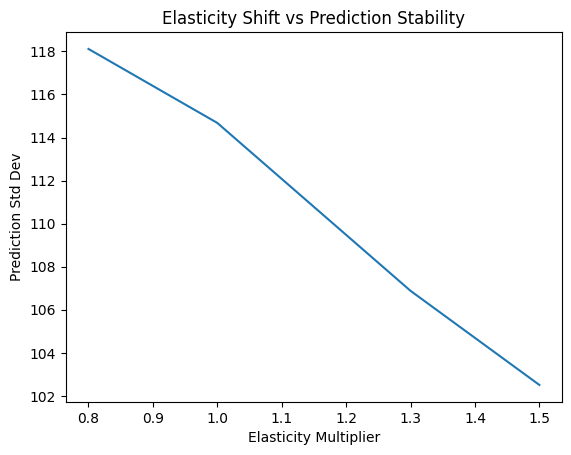

In [98]:
elasticity_factors = [0.8, 1.0, 1.3, 1.5]
std_preds = []

for f in elasticity_factors:
    X_temp = x_test.copy()
    X_temp["Elasticity Index"] *= f
    preds = rf.predict(X_temp)
    std_preds.append(np.std(preds))

plt.plot(elasticity_factors, std_preds)
plt.xlabel("Elasticity Multiplier")
plt.ylabel("Prediction Std Dev")
plt.title("Elasticity Shift vs Prediction Stability")
plt.show()


---

### Prediction Distribution Comparison
Histogram of predictions:
- Before
- After scenario (e.g., competitor +10%)

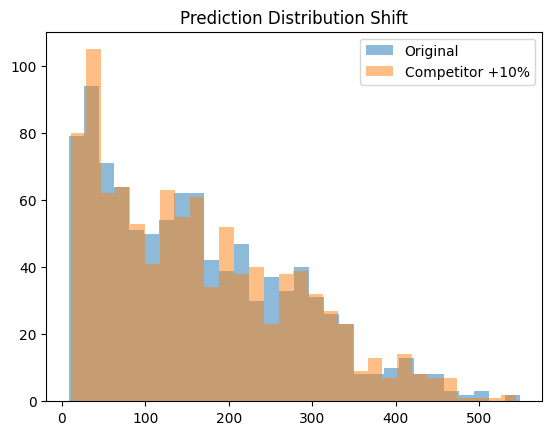

In [99]:
plt.hist(y_pred_original, bins=30, alpha=0.5, label="Original")
plt.hist(y_pred_scenario, bins=30, alpha=0.5, label="Competitor +10%")
plt.legend()
plt.title("Prediction Distribution Shift")
plt.show()
